In [2]:
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('student-scores.csv')

df.head(100)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Victoria,Jones,victoria.jones.96@gslingacademy.com,female,False,2,True,34,Software Engineer,100,98,89,85,81,64,94
96,97,Natasha,Hansen,natasha.hansen.97@gslingacademy.com,female,False,3,True,2,Artist,86,76,84,93,76,69,91
97,98,Thomas,White,thomas.white.98@gslingacademy.com,male,False,3,False,4,Real Estate Developer,87,89,93,98,79,72,88
98,99,Derrick,Figueroa,derrick.figueroa.99@gslingacademy.com,male,True,0,False,28,Lawyer,100,93,85,61,96,83,86


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [5]:
df.drop(columns=['id', 'first_name', 'last_name', 'email', 'extracurricular_activities', 'career_aspiration'], inplace=True)

In [6]:
df['gender'] = df['gender'].replace({
    'male' : 0,
    'female' : 1
})

df['avg_score'] = df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].mean(axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   2000 non-null   object 
 1   part_time_job            2000 non-null   bool   
 2   absence_days             2000 non-null   int64  
 3   weekly_self_study_hours  2000 non-null   int64  
 4   math_score               2000 non-null   int64  
 5   history_score            2000 non-null   int64  
 6   physics_score            2000 non-null   int64  
 7   chemistry_score          2000 non-null   int64  
 8   biology_score            2000 non-null   int64  
 9   english_score            2000 non-null   int64  
 10  geography_score          2000 non-null   int64  
 11  avg_score                2000 non-null   float64
dtypes: bool(1), float64(1), int64(9), object(1)
memory usage: 174.0+ KB


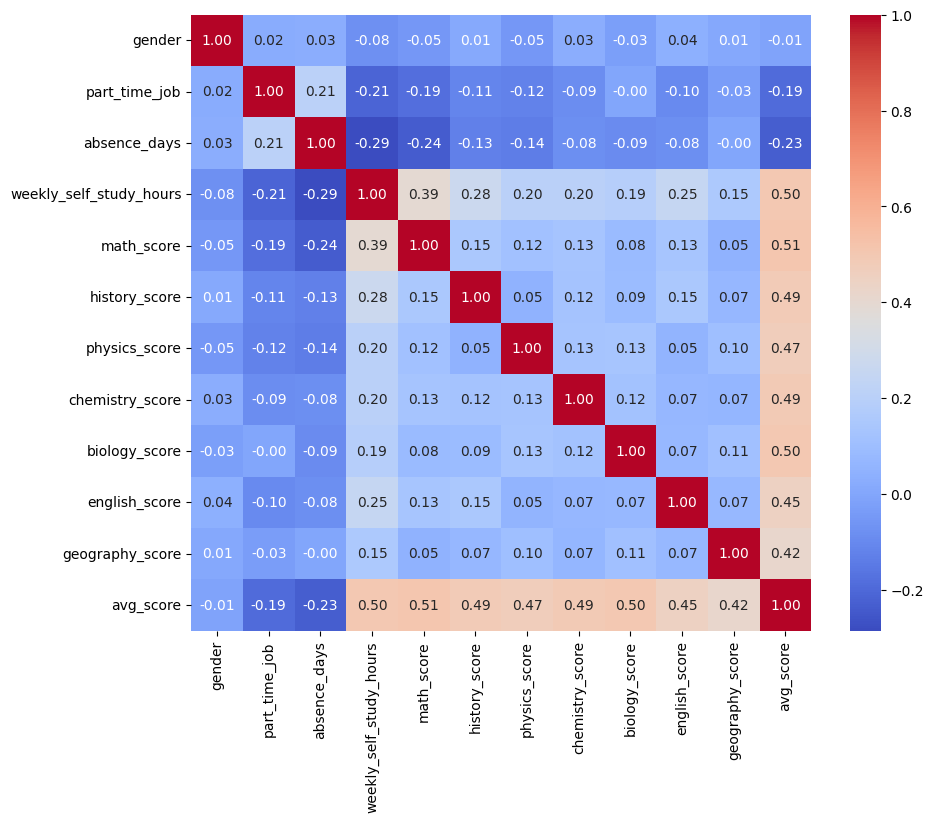

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.show()